The are 81 features describing each sales transaction in Alem, IOWA. The first step in the process to analyze the features and get a first glimpse of which feature/data is relevant to the prediction. I decided to follow the 'divide to conquer' approach by grouping the features in different following categories that known to be the areas of interest when a customer is shopping for the dream house.

I defined the following main categories:

* Kitchen features:
* Basement Features: "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"and  "TotalBsmtSF"
* Garage Features:
 "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"
* Porch Features: "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
* External Features: Exterior1st, Exterior2nd, RoofMatl, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation
* Size features:
* Quality Features: OverallQual, OverallCond
* House Type Features: "BldgType", "HouseStyle"
* House Location Features:


# Getting Started

n this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Ames, Iowa. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [Kaggle House Price Precition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The dataset has records of 1460 house sold between 2010 and 2016 in Ames, Iowa. Each data record captures a list of 79 house features (ie: size, location) and the corresponding sale price.

House features are described in a separate file: data_description.txt

The dataset were compiled by Dean De Cok and collect the house sales in the area of Ames, Iowa.

Run the following cell to load the data set:

In [67]:
import numpy as np
import pandas as pd


# read in test and train data

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
print("Ames housing dataset has {} data points with {} variables each.".format(*train_df.shape))



Ames housing dataset has 1460 data points with 81 variables each.


Duplicates are removed

In [68]:
train_df.duplicated(subset=None, keep="first")
test_df.duplicated(subset=None, keep="first")
print("Test", test_df.shape, "Train", train_df.shape)


Test (1459, 80) Train (1460, 81)


# Data Exploration

They are 81 features describing each sales transaction in Alem, IOWA. The first step in the process to analyze the features and get a first glimpse of which feature/data is relevant to the prediction. I decided to follow the 'divide to conquer' approach by grouping the features in different following categories that known to be the areas of interest when a customer is shopping for the dream house.

I defined the following main categories:

* Kitchen features:
* Basement Features: "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"and  "TotalBsmtSF"
* Garage Features:
"GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"
* Porch Features: "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
* External Features: Exterior1st, Exterior2nd, RoofMatl, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation
* Size features:
* Quality Features: OverallQual, OverallCond
* House Type Features: "BldgType", "HouseStyle"
* House Location Features:

I will then analyze each feature within each category and find opportunities:

* To delete the feature if doesn't add a significant value in the house price prediction.
* Transform numerical features to categorial features when they don't describe a magnitude.
* Transform categorial features to ordinal features when they describe a magnitude (i.e.: Excellent, Very Good, Good...e).
* Transform categorial feature to One Hot encoded feature when possible.
* Suppress duplicated features or features that are strongly correlated with each other to avoid duplication and redundancy and supress features that has very low variance.


In [69]:
# TODO: Minimum price of the data
minimum_price = train_df["SalePrice"].min()

# TODO: Maximum price of the data
maximum_price = train_df["SalePrice"].max()

# TODO: Mean price of the data
mean_price = train_df["SalePrice"].mean()

# TODO: Median price of the data
median_price = train_df["SalePrice"].median()

# TODO: Standard deviation of prices of the data
std_price = train_df["SalePrice"].std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price $163000.0
Standard deviation of prices: $79442.50288288662


/tmp/ipykernel_7642/2949337213.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


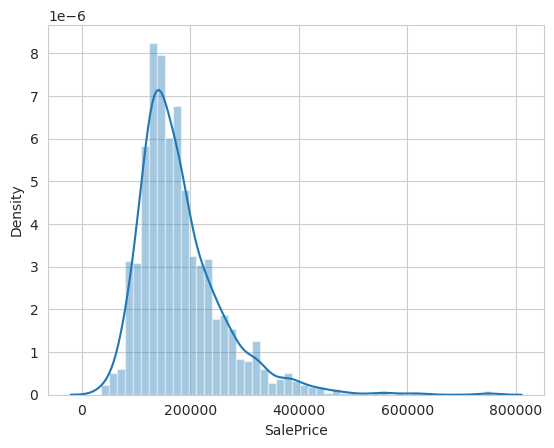

/tmp/ipykernel_7642/2949337213.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


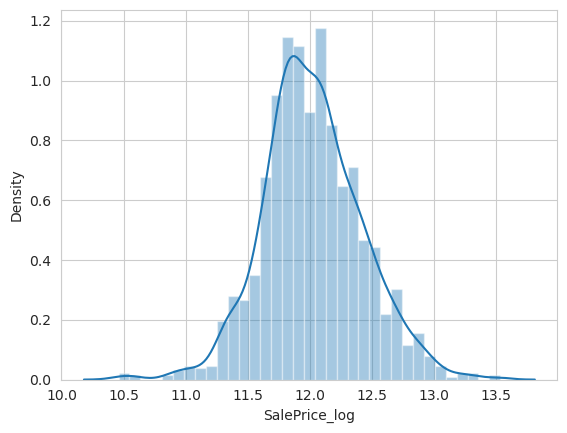

In [70]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

x = train_df.SalePrice
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

train_df["SalePrice_log"] = np.log(train_df.SalePrice)
x = train_df.SalePrice_log
sns.distplot(x)
plt.show()

## Feature Observation

They are 81 features describing each sales transaction in Alem, IOWA. The first step in the process to analyze the features and get a first glimpse of which feature/data is relevant to the prediction. I decided to follow the 'divide to conquer' approach by grouping the features in different following categories that known to be the areas of interest when a customer is shopping for the dream house.

I defined the following main categories:

* Kitchen features:
* Basement Features: "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"and  "TotalBsmtSF"
* Garage Features:
"GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"
* Porch Features: "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"
* External Features: Exterior1st, Exterior2nd, RoofMatl, RoofStyle, MasVnrArea, ExterQual, ExterCond, Foundation
* Size features:
* Quality Features: OverallQual, OverallCond
* House Type Features: "BldgType", "HouseStyle"
* House Location Features

I will then analyze each feature within each category and find opportunities:

* To delete the feature if doesn't add a significant value in the house price prediction.
* Transform numerical features to categorial features when they don't describe a magnitude.
* Transform categorial features to ordinal features when they describe a magnitude (i.e.: Excellent, Very Good, Good...e).
* Transform categorial feature to One Hot encoded feature when possible.
* Suppress duplicated features or features that are strongly correlated with each other to avoid duplication and redundancy and supress features that has very low variance.



Let's examine the data type of each feature:

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Now Let's categorize and analyze each feature

In [72]:
train_df.duplicated(subset=None, keep="first")
test_df.duplicated(subset=None, keep="first")
print("Test", test_df.shape, "Train", train_df.shape)

Test (1459, 80) Train (1460, 82)


## Basement Features

The following features are related to house basement. Do we need all the features ? Most probably no. In the following we will analyze each feature and keep only to one that contribute to the sales price prediction.

First let's analyze the data type of each feature:


In [73]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

train_df[basement_features].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1423 non-null   object
 1   BsmtCond      1423 non-null   object
 2   BsmtExposure  1422 non-null   object
 3   BsmtFinType1  1423 non-null   object
 4   BsmtFinSF1    1460 non-null   int64 
 5   BsmtFinType2  1422 non-null   object
 6   BsmtFinSF2    1460 non-null   int64 
 7   BsmtUnfSF     1460 non-null   int64 
 8   TotalBsmtSF   1460 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 102.8+ KB


The feature BsmtQual, BsmtCond, BsmtExposure and BsmtFinType have non-numerical type. However, they all describe a magnitude. The following values will be transformed to numerical values:


In [74]:
BsmtExposure = {
    "Gd" : 4, # Good Exposure
    "Av": 3,  # Average Exposure
    "Mn": 2,  # Mimimum Exposure
    "No": 1,  # No Exposure
    "NA": 0   # No Basement
}

BsmtFinType1 = {
    "GLQ": 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtFinType2 = {
    "GLQ": 6, # GLQ	Good Living Quarters
    "ALQ": 5, # LQ	Average Living Quarters
    "BLQ": 4, # BLQ	Below Average Living Quarters
    "Rec": 3, # Rec	Average Rec Room
    "LwQ": 2, # LwQ	Low Quality
    "Unf": 1, # Unf	Unfinshed
    "NA": 0
}

BsmtCond = {
    "Ex": 5,    #Excellent
    "Gd": 4,	# Good
    "TA": 3,	# Typical - slight dampness allowed
    "Fa": 2,	# Fair - dampness or some cracking or settling
    "Po": 1,    # Po	Poor - Severe cracking, settling, or wetness
    "NA": 0     # No Basement
}

BsmtQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)
test_df.replace(
    {
        "BsmtQual": BsmtQual,
        "BsmtCond": BsmtCond,
        "BsmtFinType1": BsmtFinType1,
        "BsmtFinType2": BsmtFinType2,
        "BsmtExposure": BsmtExposure
    },
    inplace=True,
)


The following graphs shows the correlation between each basement feature pair. The purpose here is to eliminate the duplicated feature or features that can be eliminated without impacting the prediction model.

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,4.0,3.0,1.0,6.0,706,1.0,0,150,856
1,4.0,3.0,4.0,5.0,978,1.0,0,284,1262
2,4.0,3.0,2.0,6.0,486,1.0,0,434,920
3,3.0,4.0,1.0,5.0,216,1.0,0,540,756
4,4.0,3.0,3.0,6.0,655,1.0,0,490,1145


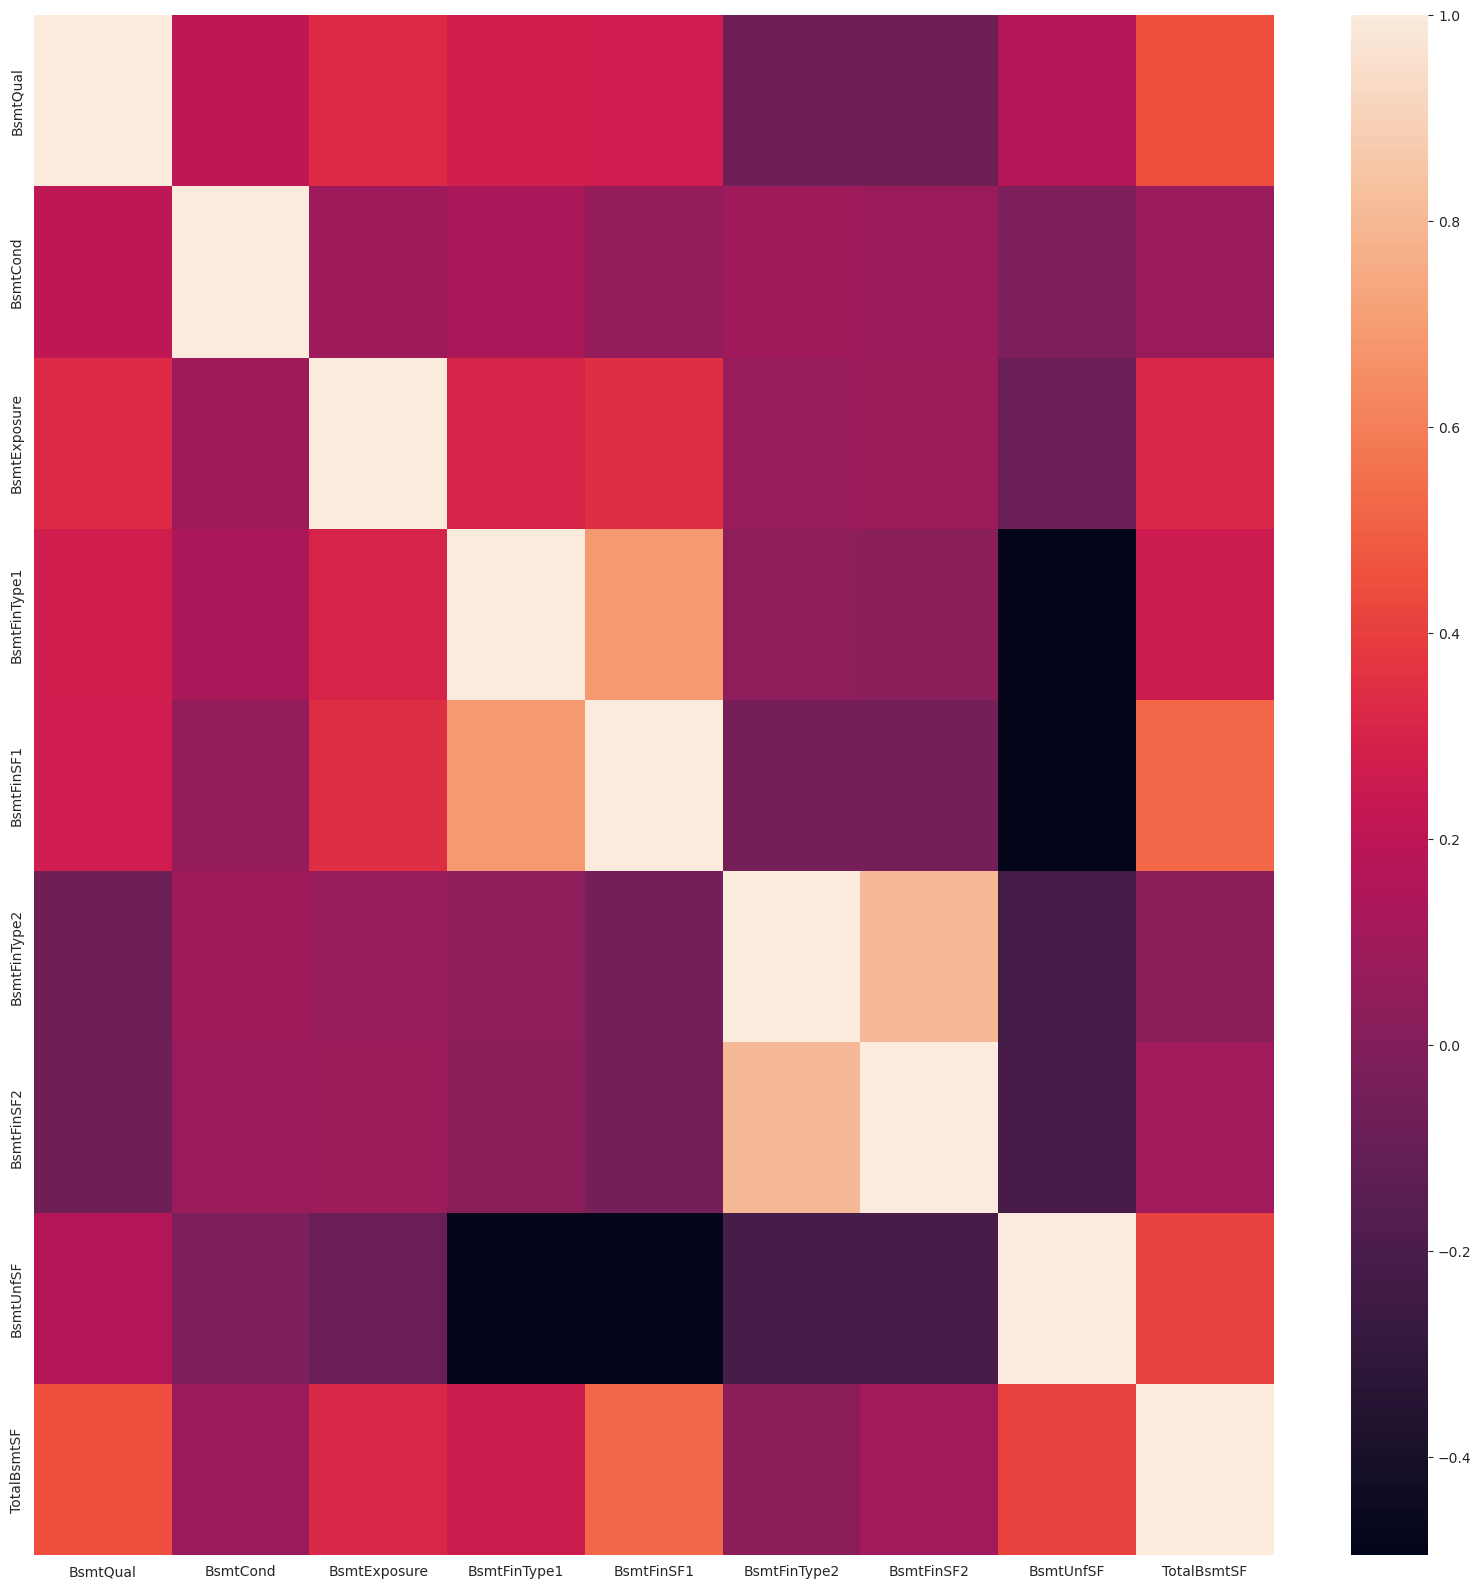

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

basement_features_df = train_df[basement_features]

plt.figure(figsize=(20, 20))
sns.heatmap(basement_features_df.corr())
basement_features_df.head()

From the graph above we notice there is strong correlation between basement size and basement type (BsmtFinSF1 and BsmtFinType1 and also between BsmtFinSF2 and BsmtFinType2). As result, We can safely discard BsmtFinSF1 and BsmtFinSF2 features.

In [76]:
train_df = train_df.drop("BsmtFinSF1", axis = 1)
train_df = train_df.drop("BsmtFinSF2", axis = 1)
test_df = test_df.drop("BsmtFinSF1", axis = 1)
test_df = test_df.drop("BsmtFinSF2", axis = 1)


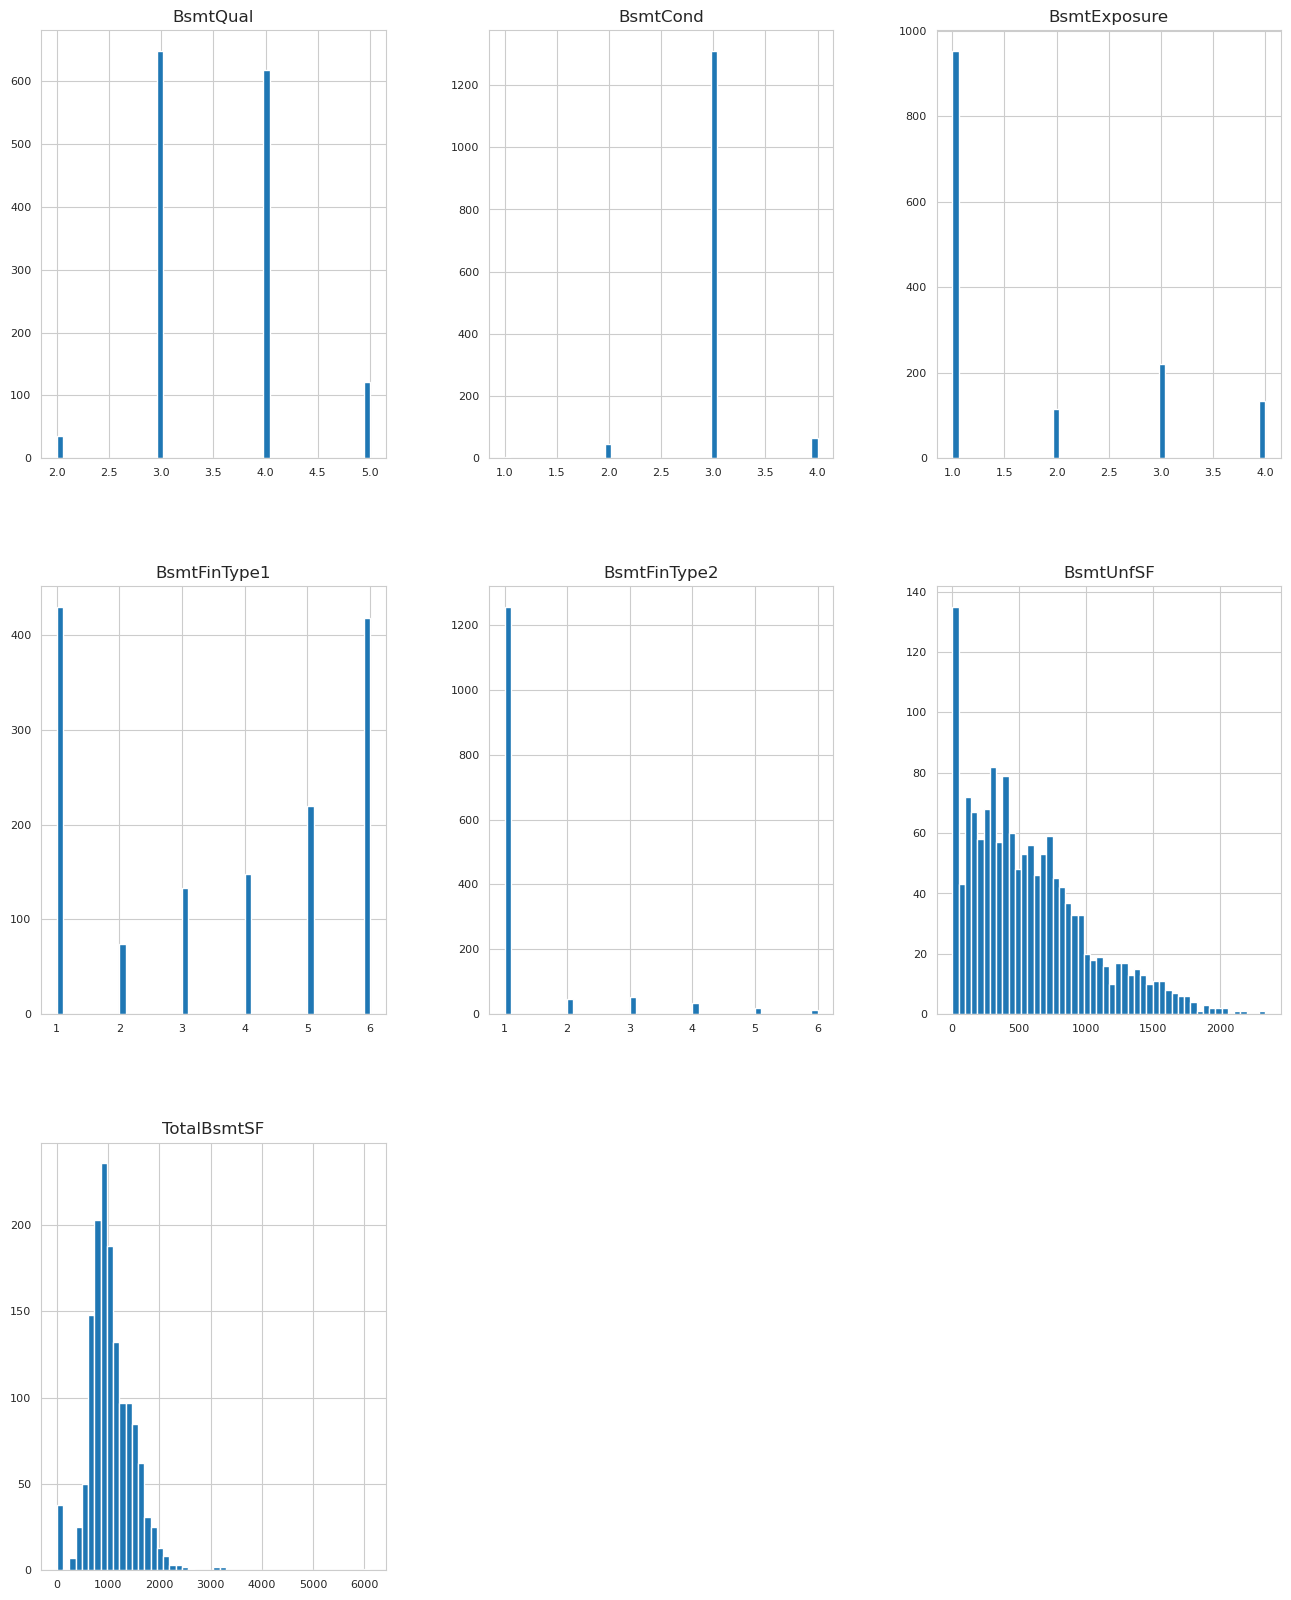

In [77]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtUnfSF", "TotalBsmtSF"]
basement_features_df = train_df[basement_features]
basement_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


From the graphs above we notice that both BsmtFinType2 and BsmtCond reflect concentration on 1 value, respectively 3 for BsmCond (most basement have average condition) and 1 for BsmtFinType2 (most basement are Unfinished). Both features will be discarded as they don't add value to the Sales Price prediction.

In [78]:
train_df = train_df.drop("BsmtFinType2", axis = 1)
train_df = train_df.drop("BsmtCond", axis = 1)
test_df = test_df.drop("BsmtFinType2", axis = 1)
test_df = test_df.drop("BsmtCond", axis = 1)

## Porch Features

In [79]:
porch_features = ["OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]
porch_features_df = train_df[porch_features]

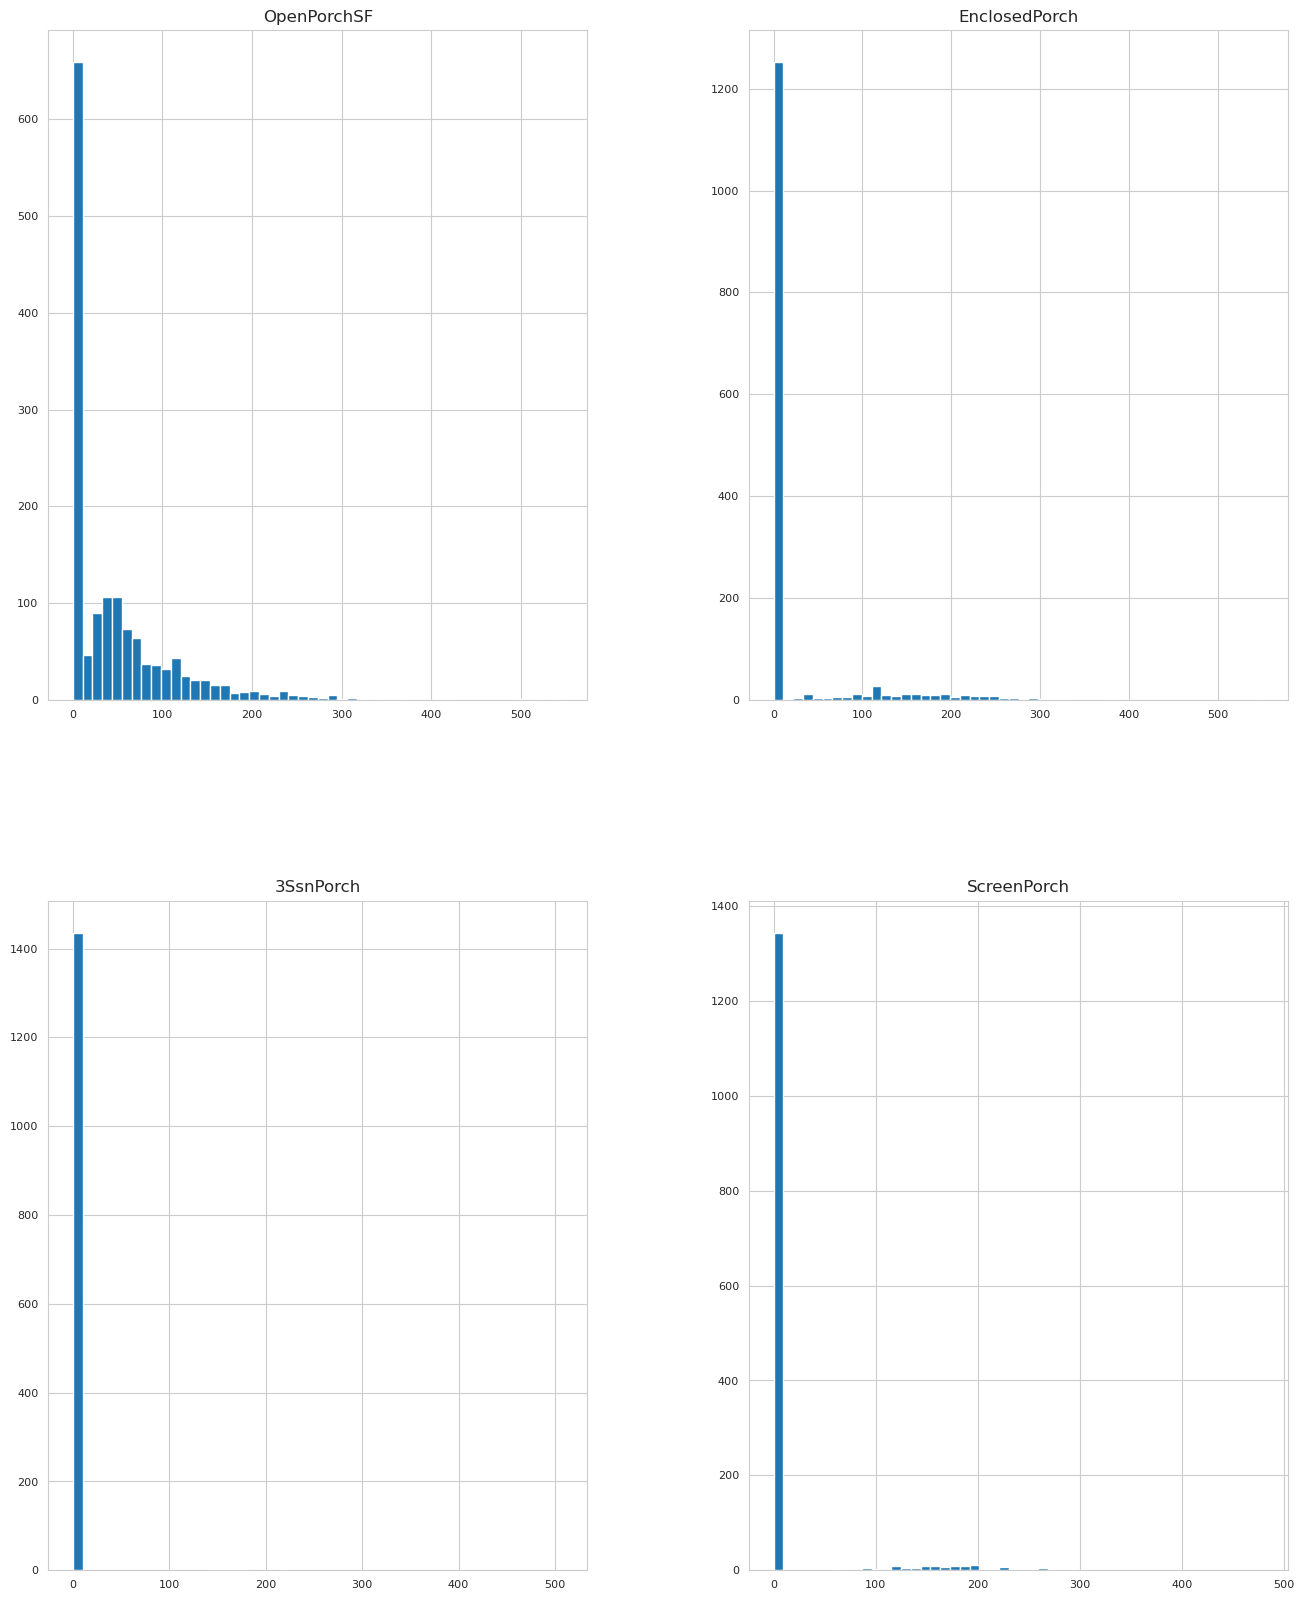

In [80]:
porch_features_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


From the graphs below it is abvious that the majority of the sold houses don't have 3 seasons, screen and enclosed orch areas. Teh following features can be discarded : 3SsnPorch, ScreePorch and EnclosedPorch.

In [81]:
train_df = train_df.drop("ScreenPorch", axis = 1)
train_df = train_df.drop("EnclosedPorch", axis = 1)
train_df = train_df.drop("3SsnPorch", axis = 1)
test_df = test_df.drop("ScreenPorch", axis = 1)
test_df = test_df.drop("EnclosedPorch", axis = 1)
test_df = test_df.drop("3SsnPorch", axis = 1)

## House External Features

External Quality and External Condition features are converted to numerical values as they reflect a magnitude.

In [82]:
ExterQual = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

ExterCond = {
    "Ex":	5, # Excellent (100+ inches)
    "Gd":	4, # Good (90-99 inches)
    "TA":	3, # Typical (80-89 inches)
    "Fa":	2, # Fair (70-79 inches)
    "Po":	1, # Poor (<70 inches
    "NA":	0  # No basement
}

train_df.replace(
    {
        "ExterCond": ExterCond,
        "ExterQual": ExterQual
    },
    inplace=True,
)
test_df.replace(
    {
        "ExterCond": ExterCond,
        "ExterQual": ExterQual
    },
    inplace=True,
)

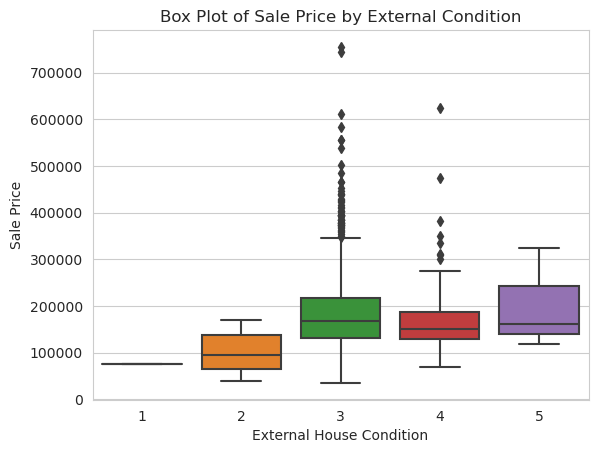

In [83]:
sns.boxplot(x=train_df['ExterCond'], y=train_df['SalePrice'])
plt.xlabel('External House Condition')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by External Condition')
plt.show()

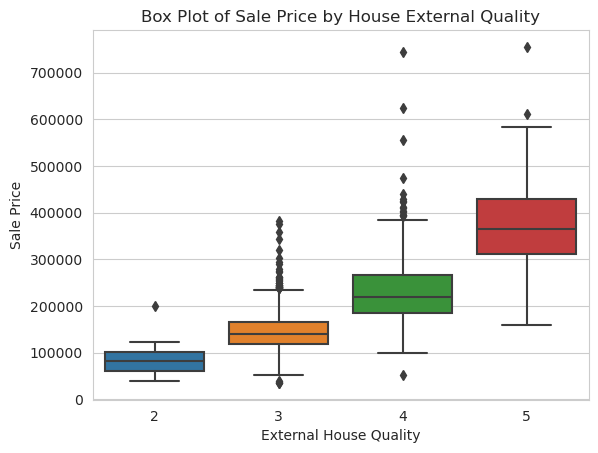

In [84]:
sns.boxplot(x=train_df['ExterQual'], y=train_df['SalePrice'])
plt.xlabel('External House Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by House External Quality')
plt.show()

The graphs above clearly show that House Sale Price increase when external house condition or quality increase.

Most sold houses have Standard (Composite) Shingle roof. We can safely discard the feature: RoofMatl

ClyTile (Clay or Tile)
CompShg (Standard (Composite) Shingle): 1434
Membran	(Membrane) : 1
Metal (Metal) : 1
Roll (Roll) : 1
Tar&Grv	(Gravel & Tar) : 11
WdShake	(Wood Shakes) : 5
WdShngl	(Wood Shingles) : 6

In [85]:
train_df = train_df.drop("RoofMatl", axis = 1)
test_df = test_df.drop("RoofMatl", axis = 1)

We could use one hot encoding for the remaining exterior categorial features but this will lead to multiplication additional features without the guarantee that it adds value in the sales prediction algorithm. I decided to only keep the numerical features External Quality and External Condition since based on the graph above the correlate well with the Sales Price.


In [86]:
train_df = train_df.drop("Exterior1st", axis = 1)
test_df = test_df.drop("Exterior1st", axis = 1)
train_df = train_df.drop("Exterior2nd", axis = 1)
test_df = test_df.drop("Exterior2nd", axis = 1)
train_df = train_df.drop("MasVnrArea", axis = 1)
test_df = test_df.drop("MasVnrArea", axis = 1)
train_df = train_df.drop("Foundation", axis = 1)
test_df = test_df.drop("Foundation", axis = 1)


## Lot Shape and Size Features

In [87]:
location_features = ["LotFrontage", "LandSlope", "LotArea", "LotShape", "LandContour", "LotConfig", ]

LandSlope, LotSlope and LandContour are categorial fetaures that can be easily replaced with numerical categories as the denote a magnitude

In [88]:
LandSlope = {
    "Gtl" : 1, # Gentle Slope
    "Mod" : 2, # Moderate Moderate
    "Sev" : 3  # Severe Slope
}

LotShape = {
    "Reg" :	1, # Regular Shape
    "IR1" : 2, # Slightly Irregular Shape
    "IR2" : 3, # Moderately Irregular Shape
    "IR3" :	4  # Irregular
}

LandContour = {
    "Lvl" : 1,  # Near Flat/Level
    "Bnk" :	2,  # Banked - Quick and significant rise from street grade to building
    "HLS" : 3,  # Hillside - Significant slope from side to side
    "Low": 4	# Depression
}

LotConfig =  { #Lot configuration
    "Inside"	: 1, # Inside lot
    "Corner"	: 2, # Corner lot
    "CulDSac"	: 3, #Cul-de-sac
    "FR2"	: 4,  #Frontage on 2 sides of property
    "FR3"	: 5,  #Frontage on 3 sides of property
}

train_df.replace(
    {
        "LandSlope": LandSlope,
        "LotShape": LotShape,
        "LandContour": LandContour,
        "LotConfig": LotConfig,
    },
    inplace=True,
)

test_df.replace(
    {
        "LandSlope": LandSlope,
        "LotShape": LotShape,
        "LandContour": LandContour,
        "LotConfig": LotConfig,

    },
    inplace=True,
)

LotSlop and LandContour features both describe inclinaison of the lot and land on which the house is built. The
correlation graph confirms a corelation of close to 0.7. We can safely discard LandContour in favour of LotSlop feature.

<Axes: >

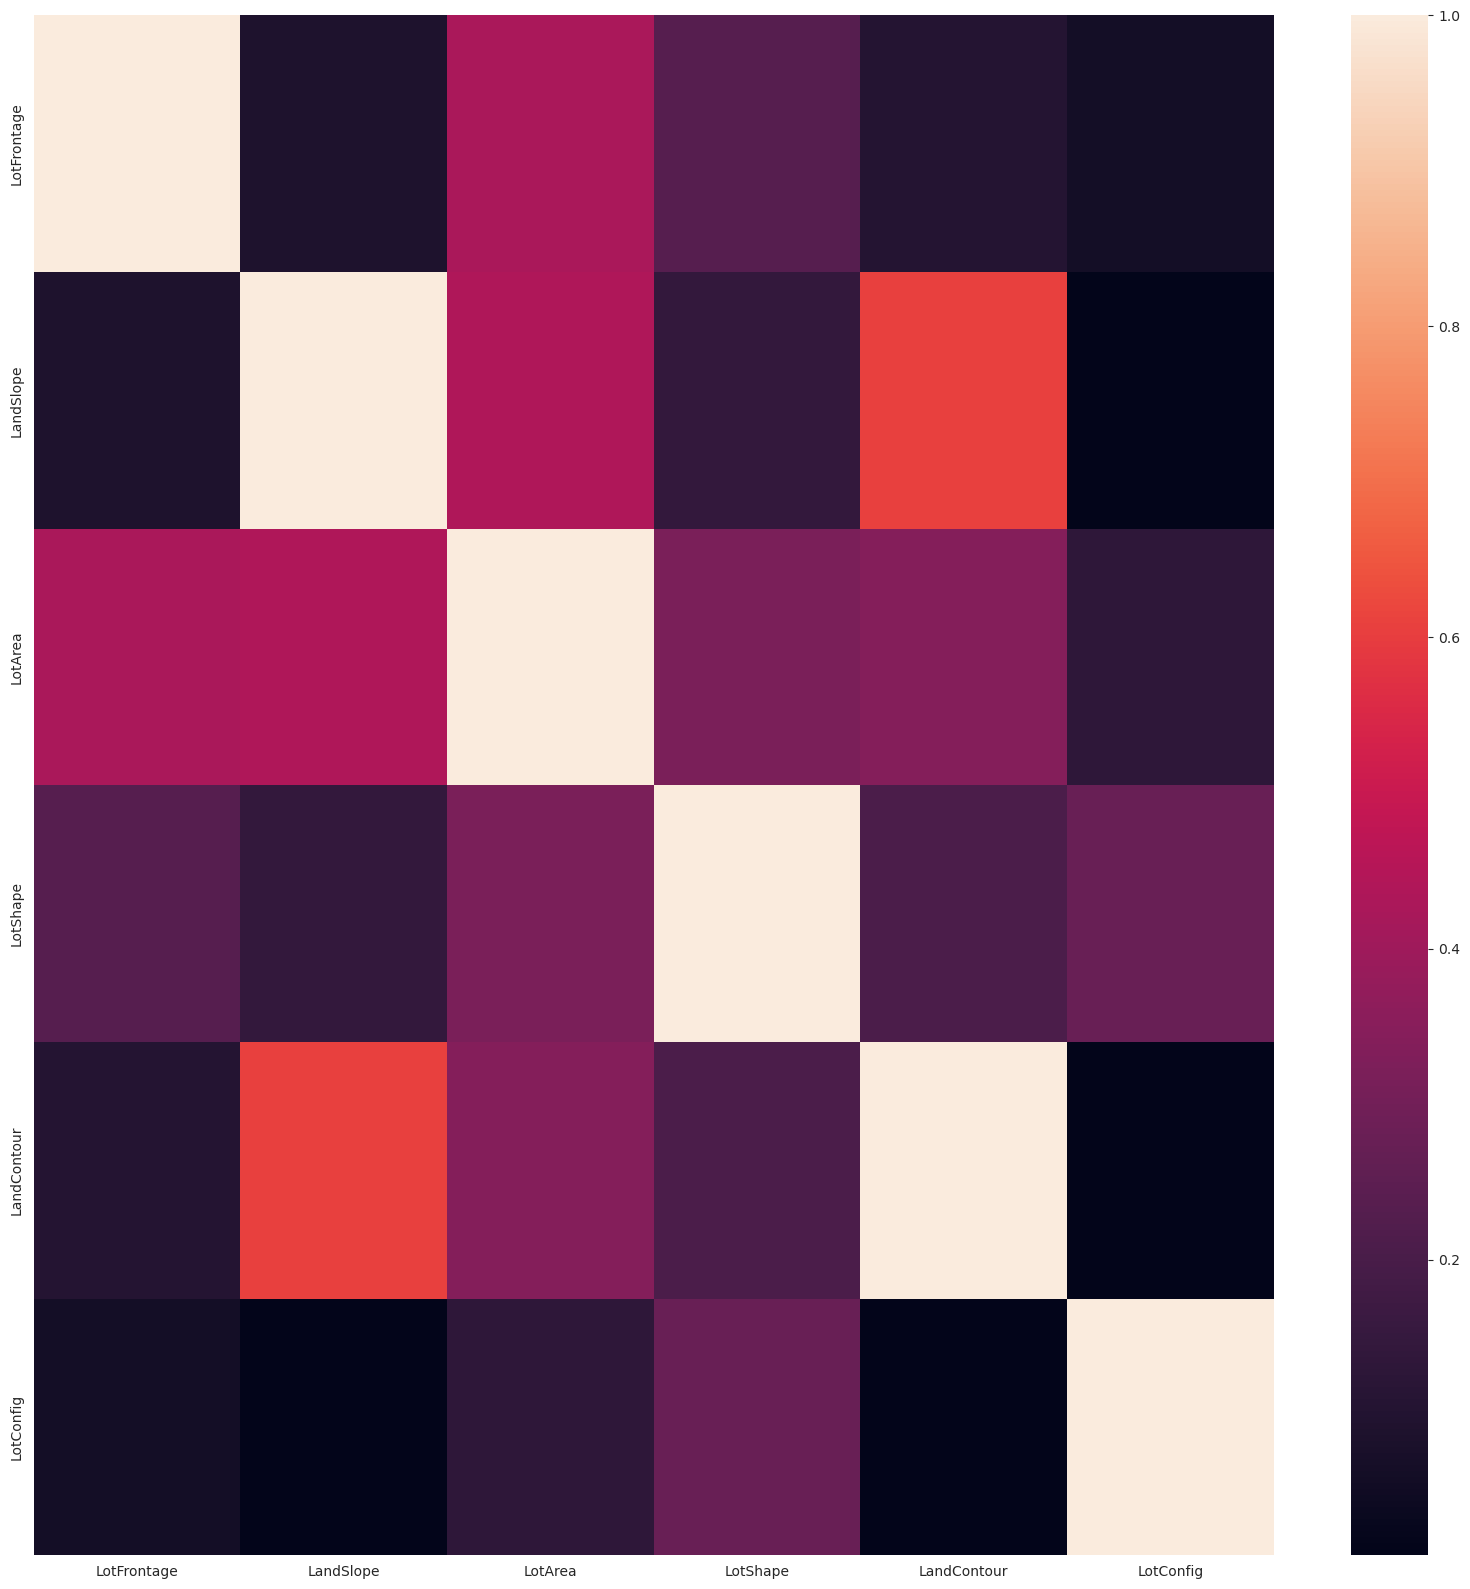

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

location_features_df = train_df[location_features]

plt.figure(figsize=(20, 20))
sns.heatmap(location_features_df.corr())

In [90]:
train_df = train_df.drop("MSZoning", axis = 1)
test_df = test_df.drop("MSZoning", axis = 1)
train_df = train_df.drop("Condition1", axis = 1)
test_df = test_df.drop("Condition1", axis = 1)
train_df = train_df.drop("Condition2", axis = 1)
test_df = test_df.drop("Condition2", axis = 1)

### Home Size Feature : TotRmsAbvGrd, Bedroom, GrLivArea, 1stFlrSF, 2ndFlrSF


It is known that the size of the house contribute  impact the price of the house.

In [91]:
house_size_features = ["TotRmsAbvGrd", "BedroomAbvGr", "GrLivArea", "1stFlrSF", "2ndFlrSF"]


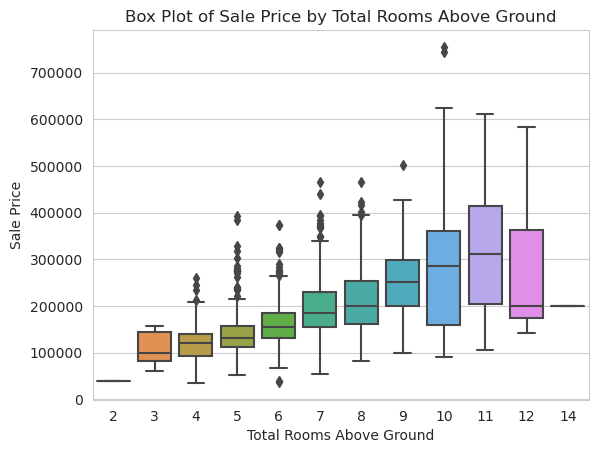

In [92]:
sns.boxplot(x=train_df['TotRmsAbvGrd'], y=train_df['SalePrice'])
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Total Rooms Above Ground')
plt.show()

We can notice from the graph above that increase in the number of rooms result in sale price increase. However, from 8 room to above the increase is not obvious from the graph.

Let's confirm if the same applies for the remaining features:

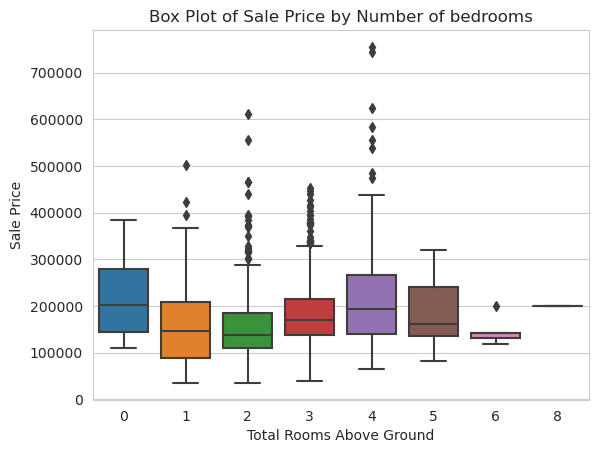

In [93]:
sns.boxplot(x=train_df['BedroomAbvGr'], y=train_df['SalePrice'])
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price by Number of bedrooms')
plt.show()

In [94]:
train_df["BedroomAbvGr"].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

Surprisly the same doesn't apply to the feature 'BedroomAbvGr'. The graph shows that Houses with 0 bedroooms has the highest sales price. There are only 6 houses with 0 bedrooms. Let's inspect their sales data to find any anomaly in data:

In [95]:
train_df[train_df["BedroomAbvGr"] == 0]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_log
53,54,20,68.0,50271,Pave,NaN,2,4,AllPub,1,...,NaN,NaN,NaN,0,11,2006,WD,Normal,385000,12.860999
189,190,120,41.0,4923,Pave,NaN,1,1,AllPub,1,...,NaN,NaN,NaN,0,8,2008,WD,Normal,286000,12.563747
634,635,90,64.0,6979,Pave,NaN,1,1,AllPub,1,...,NaN,GdPrv,Shed,600,6,2010,WD,Normal,144000,11.877569
1163,1164,90,60.0,12900,Pave,NaN,1,1,AllPub,1,...,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959,11.598727
1213,1214,80,NaN,10246,Pave,NaN,2,1,AllPub,3,...,NaN,NaN,NaN,0,5,2006,WD,Normal,145000,11.884489
1270,1271,40,NaN,23595,Pave,NaN,1,4,AllPub,1,...,NaN,NaN,NaN,0,4,2010,WD,Normal,260000,12.468437


,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,1stFlrSF,2ndFlrSF
0,8,3,1710,856,854
1,6,3,1262,1262,0
2,6,3,1786,920,866
3,7,3,1717,961,756
4,9,4,2198,1145,1053


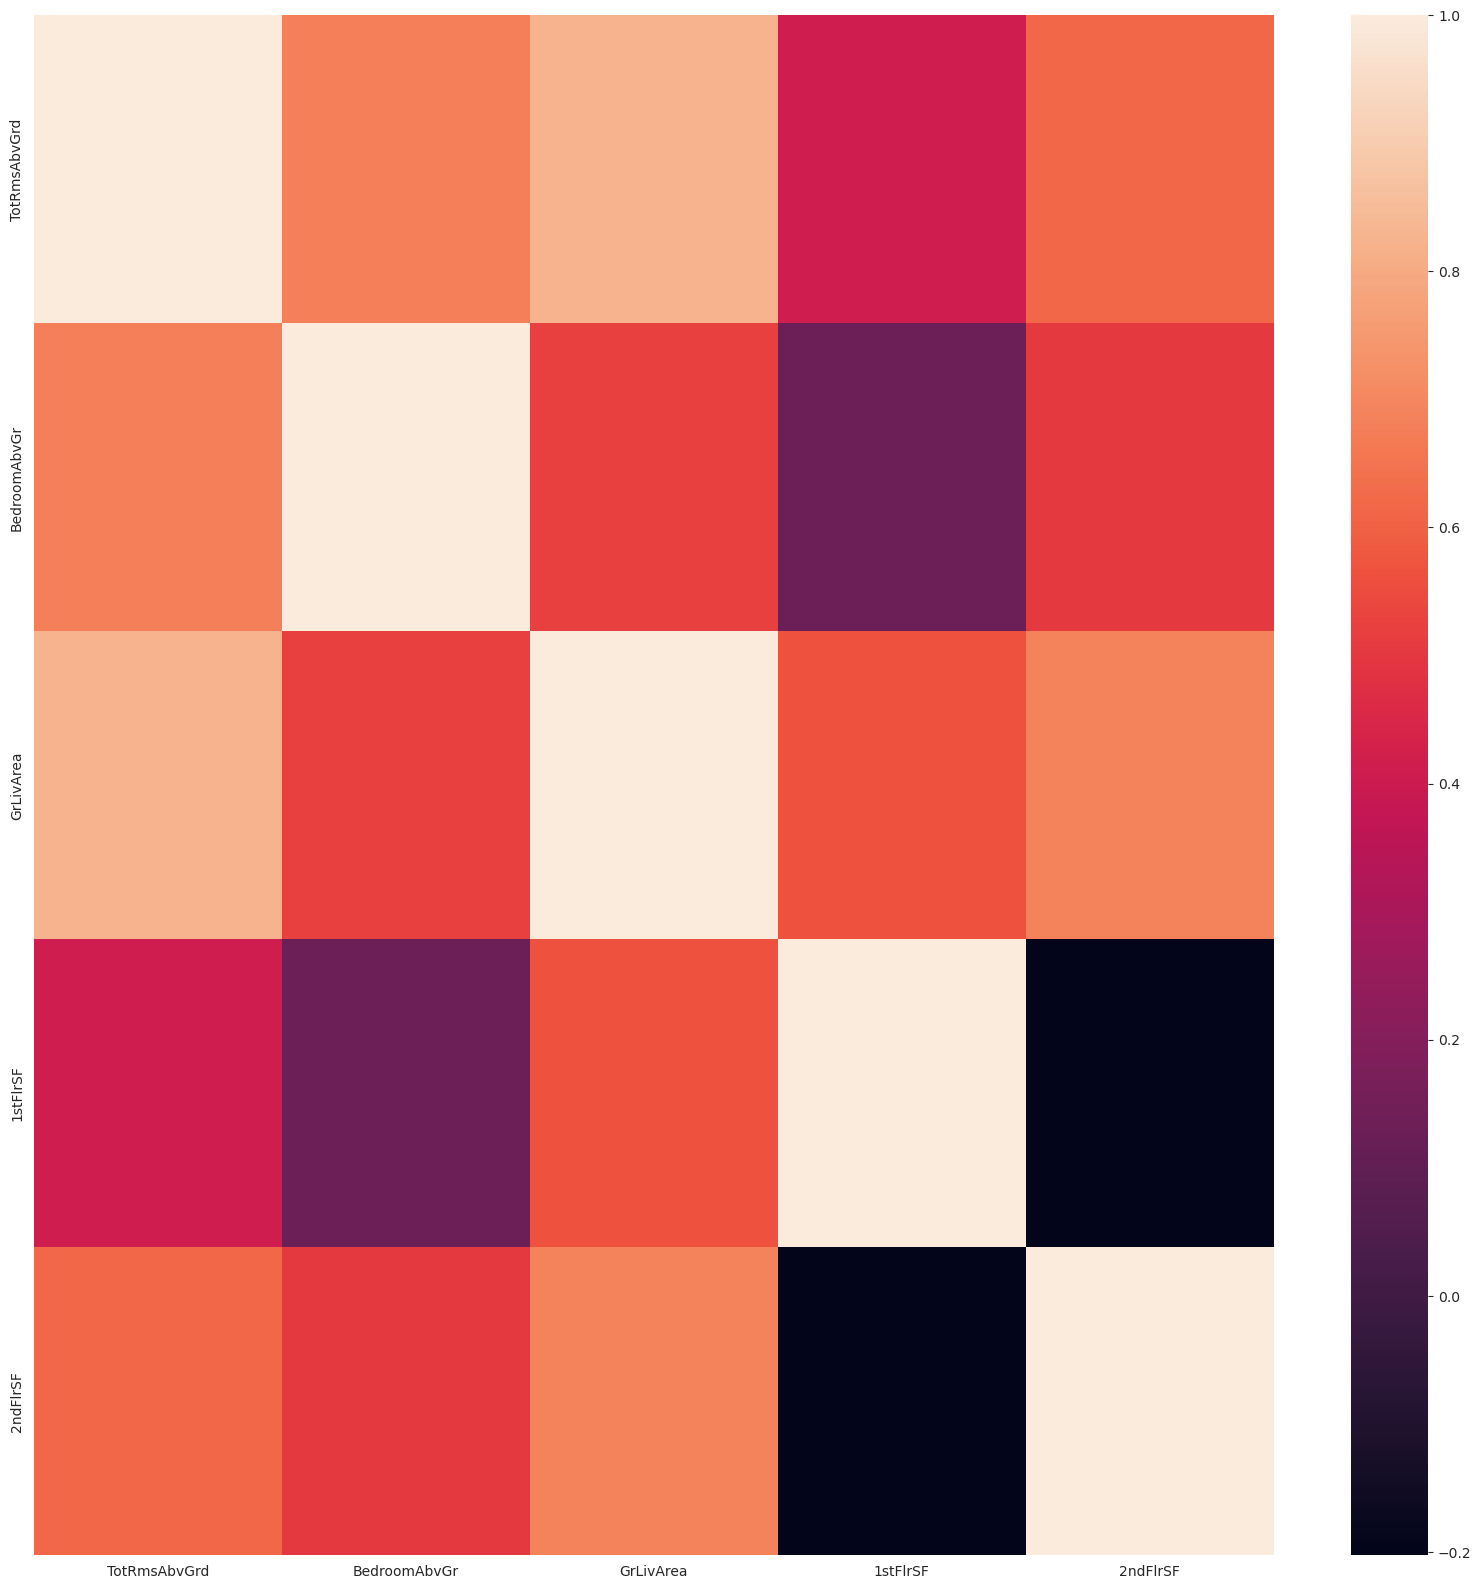

In [96]:
house_size_features_df = train_df[house_size_features]

plt.figure(figsize=(20, 20))
sns.heatmap(house_size_features_df.corr())
house_size_features_df.head()

We notice from the graph a strong correlation between the features: Living Area Above Ground (GrLivArea), Total Rooms Above Ground (BedroomAbvGr) and Total Rooms Above Ground (TotalRmsAbvGrd). Also, I decided to discard the features 1 floor size (1nstFrSF) and 2 floor size (2nstFrSF) for a seek of simplicity.

In [97]:
train_df = train_df.drop("1stFlrSF", axis = 1)
test_df = test_df.drop("1stFlrSF", axis = 1)
train_df = train_df.drop("2ndFlrSF", axis = 1)
test_df = test_df.drop("2ndFlrSF", axis = 1)
train_df = train_df.drop("BedroomAbvGr", axis = 1)
test_df = test_df.drop("BedroomAbvGr", axis = 1)

## Garage Features

In [98]:
garage_features = ["GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

In [99]:
train_df[garage_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageYrBlt   1379 non-null   float64
 1   GarageFinish  1379 non-null   object 
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   GarageQual    1379 non-null   object 
 5   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 68.6+ KB


## Garage Features

GarageCond, GarageQual and GarageFinish are non-numerical features. However, since quality is a feature that can be measured and has a magnitude GarageQual and GarageCond will be converted to numerical categories. Same apply to GarageFinish feature since it also reflects a magnitute (how much of basement space is finished)

In [100]:
GarageQual = {
    "Ex": 5, # Excellent
    "Gd": 4, # Good
    "TA": 3, # Typical/Average
    "Fa": 2, # Fair
    "Po": 1, # Poor
    "NA": 0  # No Garage
}
GarageCond = {
    "Ex": 5, #	Excellent,
    "Gd": 4, #	Good,
    "TA": 3, #	Typical/Average
    "Fa": 2, #  Fair
    "Po": 1, #  Poor
    "NA": 0  # No Garage
}

GarageFinish = {
    # Interior finish of the garage
    "Fin":	3, # Finished
    "RFn":	2, # Rough Finished
    "Unf":	1, # Unfinished
    "NA": 0,   # No Garage
}

garage_features = ["GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]

train_df[garage_features]

train_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)
test_df.replace(
    {
        "GarageFinish": GarageFinish,
        "GarageCond": GarageCond,
        "GarageQual": GarageQual
    },
    inplace=True,
)



The correlation graph below highlight that fact that GarageArea (Garage size in square footage) and GarageCars (number of cars that can fit in the garage) are strongly correlated. As result of that, I will discard GarageArea.

,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,2003.0,2.0,2,548,3.0,3.0
1,1976.0,2.0,2,460,3.0,3.0
2,2001.0,2.0,2,608,3.0,3.0
3,1998.0,1.0,3,642,3.0,3.0
4,2000.0,2.0,3,836,3.0,3.0


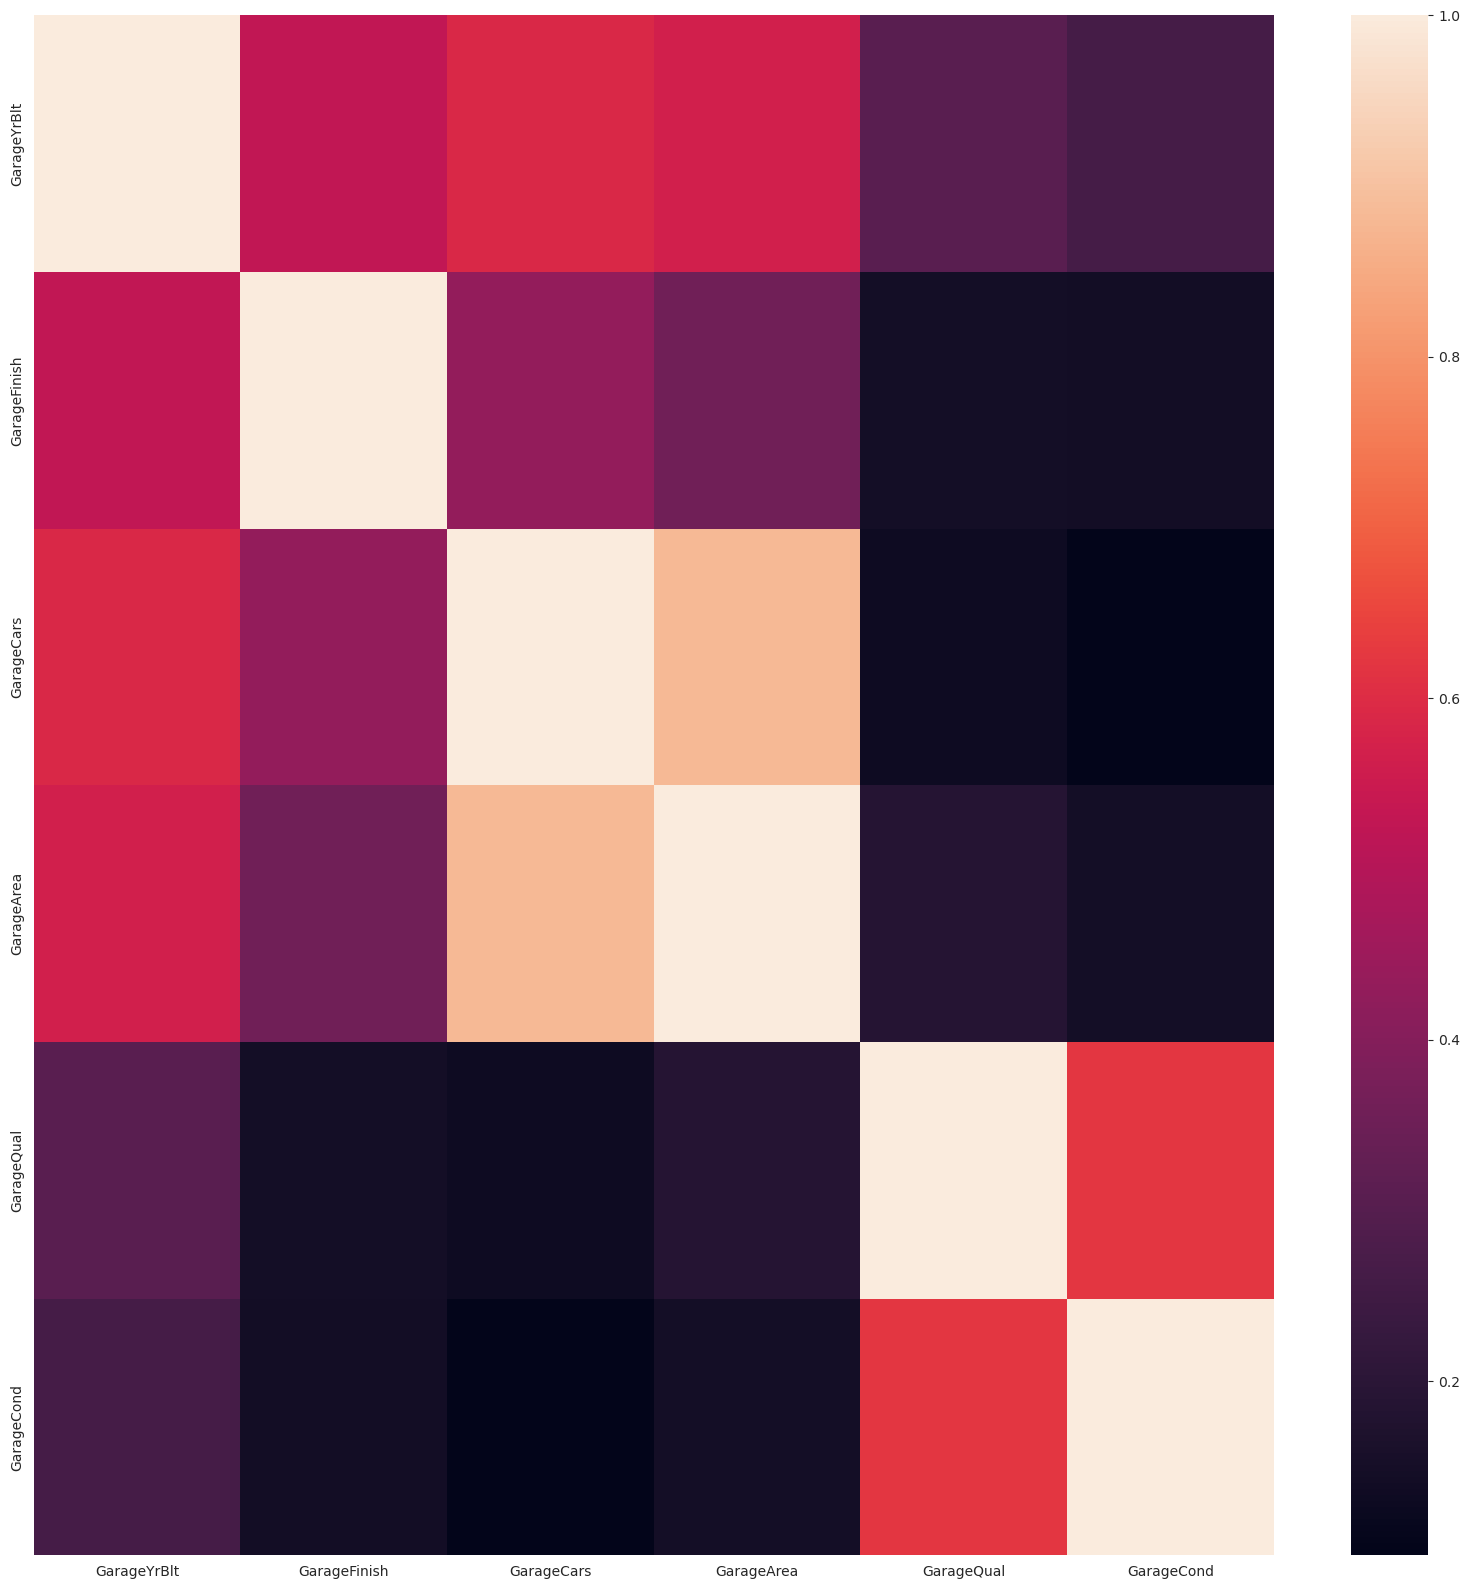

In [101]:
garage_features_df = train_df[garage_features]

plt.figure(figsize=(20, 20))
sns.heatmap(garage_features_df.corr())
garage_features_df.head()

In [102]:
train_df = train_df.drop("GarageArea", axis = 1)
test_df = test_df.drop("GarageArea", axis = 1)

## Utilities Featutes


In [103]:
utilities_features = ["Electrical", "Utilities", "Fireplaces", "FireplaceQu", "Heating", "HeatingQC", "CentralAir"]


In [104]:
utilities_features_df = train_df[utilities_features]
utilities_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Electrical   1459 non-null   object
 1   Utilities    1460 non-null   object
 2   Fireplaces   1460 non-null   int64 
 3   FireplaceQu  770 non-null    object
 4   Heating      1460 non-null   object
 5   HeatingQC    1460 non-null   object
 6   CentralAir   1460 non-null   object
dtypes: int64(1), object(6)
memory usage: 80.0+ KB


Fireplace quality feature (FireplaceQu) reflect a magnitude. However, it have a non-numerical value. We can convert it to numerical values reflecing values increasing from 0 (no fireplace) to 5 (fireplace in excellent condition).

In [105]:
fireplace_quality = {
    "Ex": 5, # Excellent - Exceptional Masonry Fireplace
    "Gd": 4, # Good - Masonry Fireplace in main level
    "TA": 3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    "Fa": 2, # Fair - Prefabricated Fireplace in basement
    "Po": 1, # Poor - Ben Franklin Stove
    "NA": 0  # No Fireplace
}
train_df.replace(
    {
        "FireplaceQu": fireplace_quality,
    },
    inplace=True,
)

test_df.replace(
    {
        "FireplaceQu": fireplace_quality,
    },
    inplace=True,
)

The features "Electrical", "Utilities", "Heating", "HeatingQC" and "CentralAir" will be discarded as they don't manifest a normal distribution. For example all entries have Utilities except 1 as "AllPubl" (All public Utilities)

In [106]:
train_df = train_df.drop("Electrical", axis=1)
test_df = test_df.drop("Electrical", axis=1)


In [107]:
train_df = train_df.drop("Utilities", axis = 1)
test_df = test_df.drop("Utilities", axis = 1)

In [108]:
train_df = train_df.drop("Heating", axis = 1)
test_df = test_df.drop("Heating", axis = 1)

In [109]:
train_df = train_df.drop("HeatingQC", axis = 1)
test_df = test_df.drop("HeatingQC", axis = 1)

In [110]:
train_df = train_df.drop("CentralAir", axis = 1)
test_df = test_df.drop("CentralAir", axis = 1)

## Kitchen Features

In [111]:
kitchen_features = ["KitchenAbvGr", "KitchenQual"]

My feeling is that the kitchen quality matters more in influencing the sales price of the house. Most houses will have 1 kitchen. Indeed, from the collected data only 4% of the houses have 2 kitchens, 1 house has no kitchen and 2 houses have 3 kitchens. It is safe to discard this feature as it doesn't add value to the sales prediction.

In [112]:
train_df["KitchenAbvGr"].value_counts()


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [113]:
train_df = train_df.drop("KitchenAbvGr", axis = 1)
test_df = test_df.drop("KitchenAbvGr", axis = 1)

The feature "KitchenQual" can be transformed to a numerical value as it reflect a magnitude.


In [141]:
kitchen_quality = {
    "Ex": 5, # Excellent - Exceptional Masonry Fireplace
    "Gd": 4, # Good - Masonry Fireplace in main level
    "TA": 3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    "Fa": 2, # Fair - Prefabricated Fireplace in basement
    "Po": 1, # Poor - Ben Franklin Stove
}

train_df.replace(
    {
        "KitchenQual": kitchen_quality,
    },
    inplace=True,
)
test_df.replace(
    {
        "KitchenQual": kitchen_quality,
    },
    inplace=True,
)

## Pool Features

From the home sales data only 7 houses out of 1460 have a swimming pool. We can safely discard pool featured as it doesn't add value to the sales price prediction.

In [115]:
pool_features = ["PoolArea", "PoolQC"]
train_df["PoolArea"].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [116]:
train_df = train_df.drop("PoolArea", axis = 1)
test_df = test_df.drop("PoolArea", axis = 1)

In [117]:
train_df = train_df.drop("PoolQC", axis = 1)
test_df = test_df.drop("PoolQC", axis = 1)

## Bathrooms Features


I decided that half bath can be counted as full bath. As result, new features are created total_bathroom and total_basement_bathroom replacing FullBath, HalfBath, BsmtHalfBath and BsmtFullBath. I found this approach will simply the model whithout scarifying the precision of the prediction.

In [118]:
train_df["total_bathroom"] =  train_df["FullBath"] + train_df["HalfBath"]
train_df["total_basement_bathroom"] =  train_df["BsmtHalfBath"] + train_df["BsmtFullBath"]

test_df["total_bathroom"] =  test_df["FullBath"] + test_df["HalfBath"]
test_df["total_basement_bathroom"] =  test_df["BsmtHalfBath"] + test_df["BsmtFullBath"]

bathroom_features = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "total_bathroom", "total_basement_bathroom"]

<Axes: >

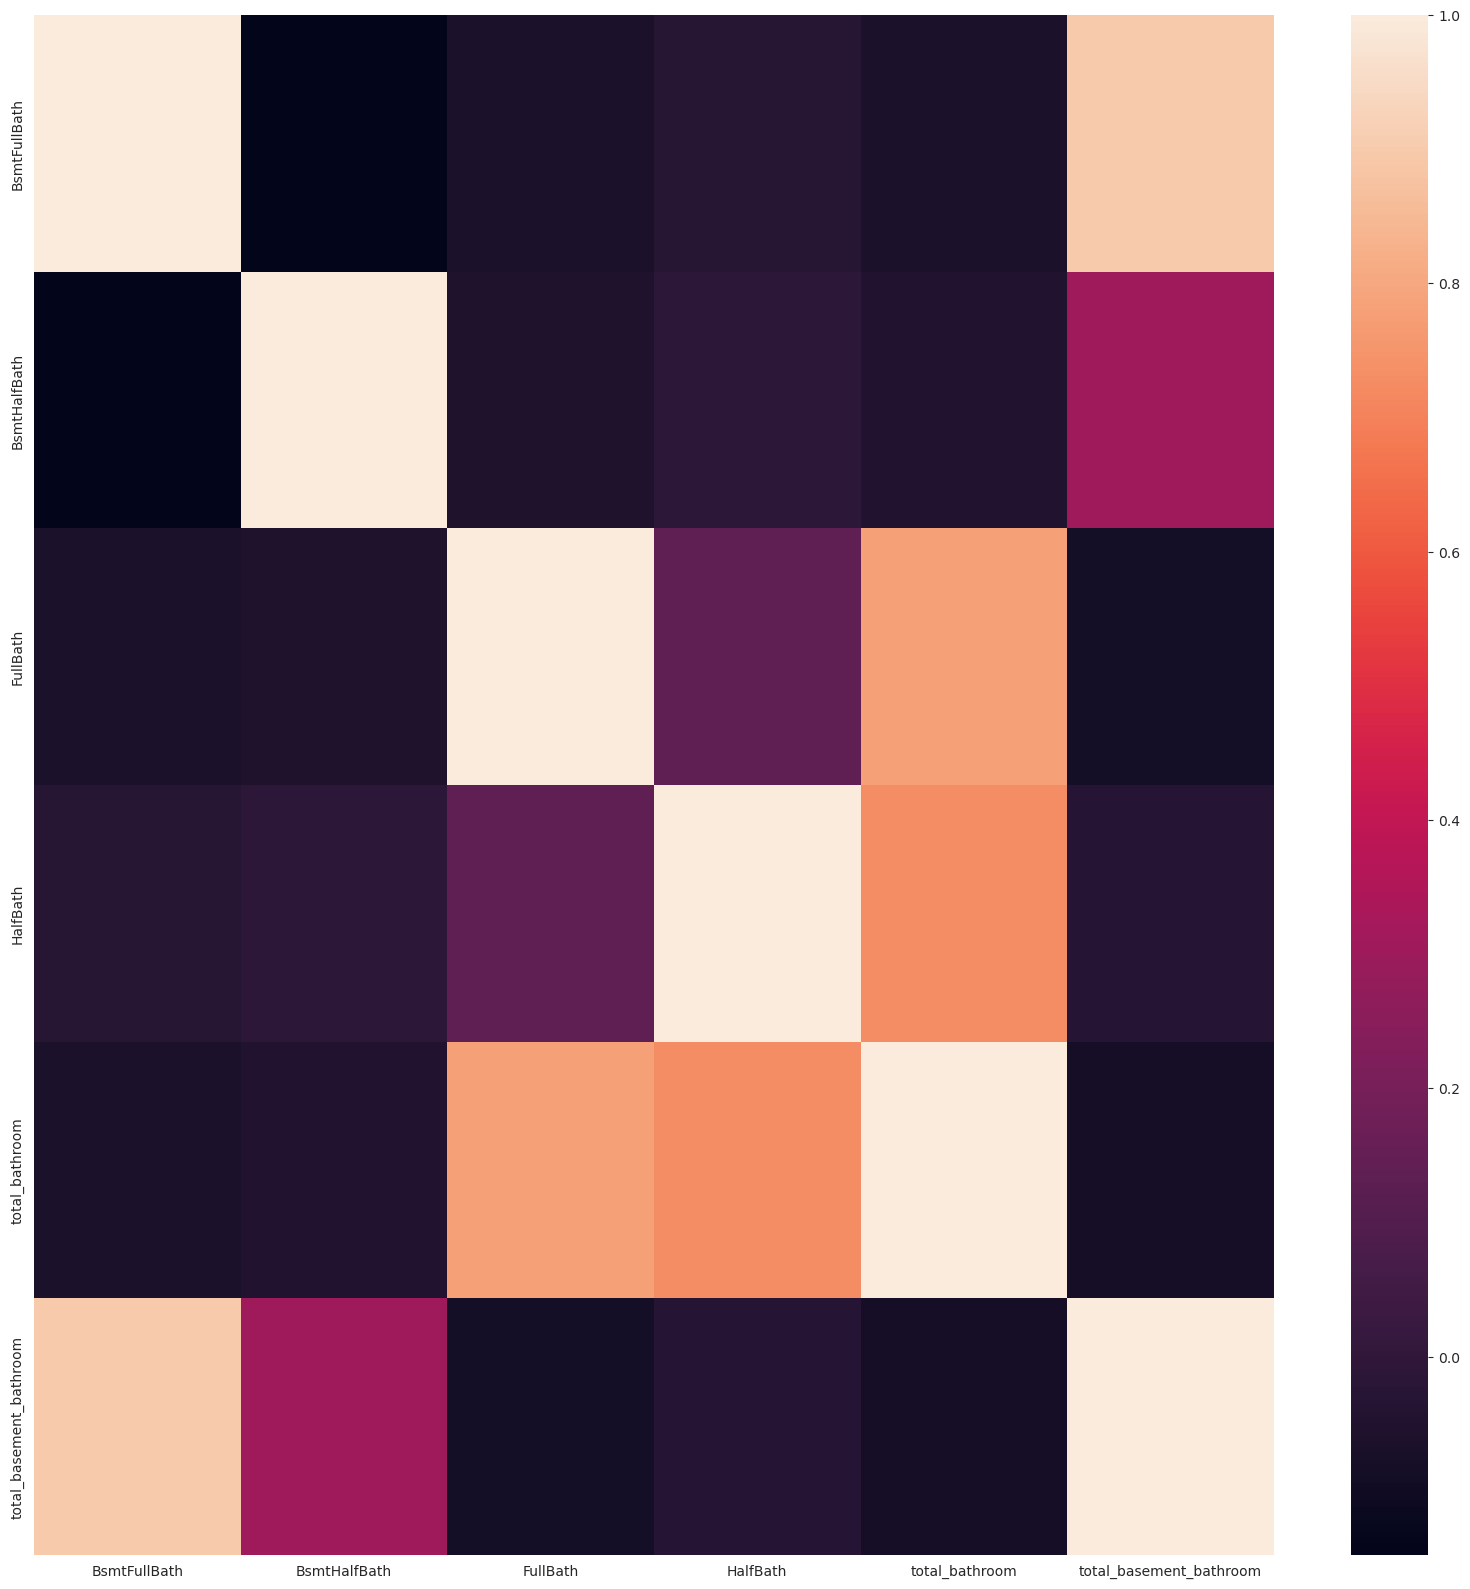

In [119]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df[bathroom_features].corr())

We can conclude from that decision to introduce the new features: total_bathroom and total_basement_bathroom was right since the graph above clearly shows a correlation between: FullBath and total_bathroom and between BsmtFullBath and total_basement_bathroom and also between HalfBath and total_bathroom and BsmtHalfBath and total_basement_bathroom .

In [120]:
train_df = train_df.drop("BsmtFullBath", axis = 1)
test_df = test_df.drop("BsmtFullBath", axis = 1)
train_df = train_df.drop("BsmtHalfBath", axis = 1)
test_df = test_df.drop("BsmtHalfBath", axis = 1)
train_df = train_df.drop("FullBath", axis = 1)
test_df = test_df.drop("FullBath", axis = 1)
train_df = train_df.drop("HalfBath", axis = 1)
test_df = test_df.drop("HalfBath", axis = 1)

## Home Type features


The building type fearture ("BldgType") and House Style feature ("HouseStyle") can be converted to numerical category as it reflect a magnitude.

In [121]:
BldgType = {
    "1Fam" : 1, #	Single-family Detached
    "2FmCon" : 2,	# Two-family Conversion; originally built as one-family dwelling
    "2fmCon" : 2,	# Two-family Conversion; originally built as one-family dwelling
    "Duplx" : 3, 	# Duplex
    "Duplex" : 3, 	# Duplex
    "TwnhsE" : 4,	# Townhouse End Unit
    "Twnhs" : 4,	# Townhouse End Unit
    "TwnhsI" : 5	# Townhouse Inside Unit
}

HouseStyle = {
    "1Story" : 1,  #	One story
    "1.5Unf" :	2, #, # One and one-half story: 2nd level unfinished
    "1.5Fin" :	3, # One and one-half story: 2nd level finished
    "2Story" : 4, #	Two story
    "2.5Unf" :	5, # Two and one-half story: 2nd level unfinished
    "2.5Fin" : 6, #	Two and one-half story: 2nd level finished
    "SFoyer" : 7, #	Split Foyer
    "SLvl"	: 8  # Split Level
}

train_df.replace(
    {
        "BldgType": BldgType,
    },
    inplace=True,
)

test_df.replace(
    {
        "BldgType": BldgType,
    },
    inplace=True,
)

train_df.replace(
    {
        "HouseStyle": HouseStyle,
    },
    inplace=True,
)

test_df.replace(
    {
        "HouseStyle": HouseStyle,
    },
    inplace=True,
)
home_type_features = ["BldgType", "HouseStyle", "MSSubClass"]

<Axes: >

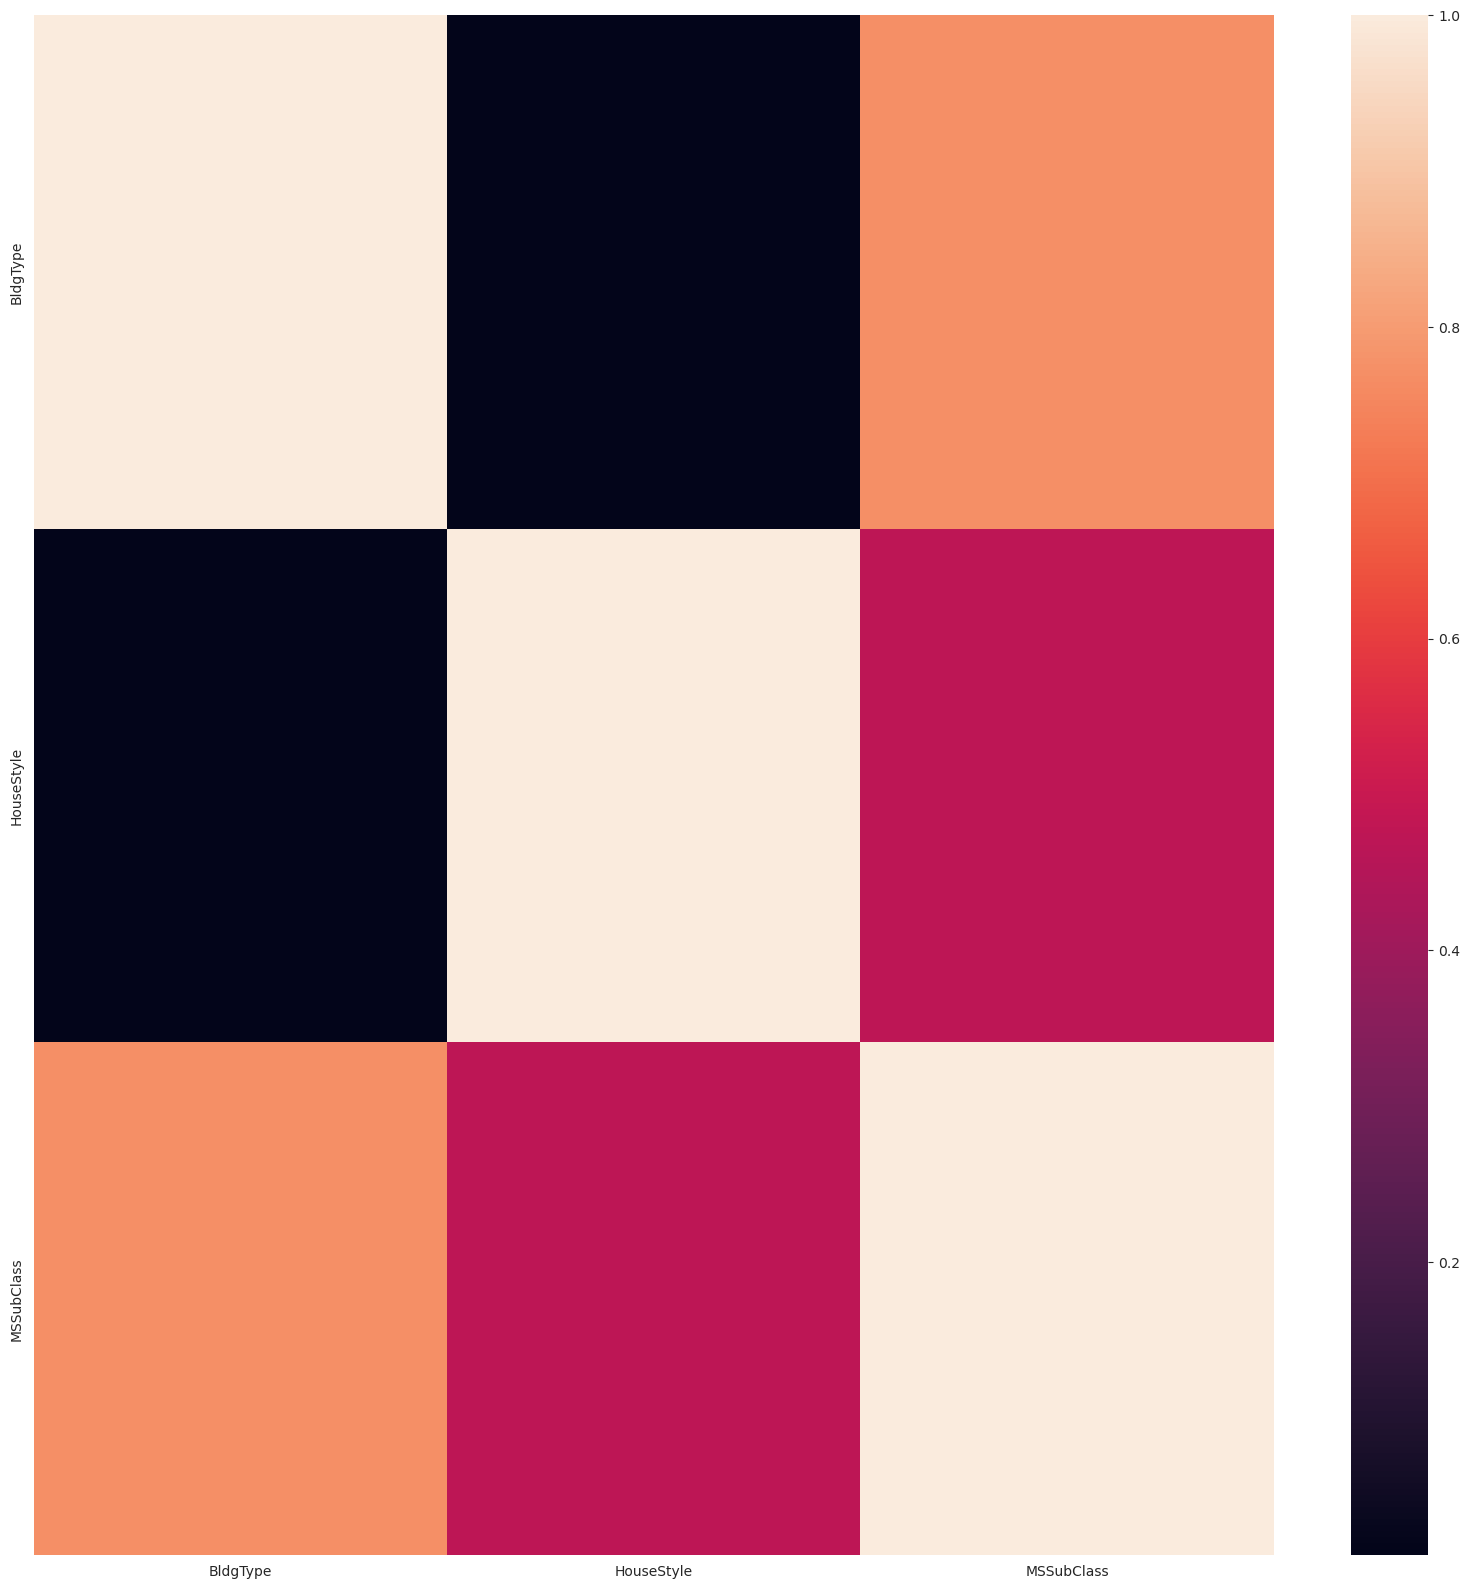

In [122]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_df[home_type_features].corr())

From the graph above, we can clearly see that  MSSubClass correlate with BldgType. The feature MSSubClass can be discarded.


In [123]:
train_df = train_df.drop("MSSubClass", axis = 1)
test_df = test_df.drop("MSSubClass", axis = 1)

## Feature : Neighborhood

I decided to have special treatment for the feature: Neighborhood. It is known that Neighborhood is known to have direct influence on the house price. Usually, people are more attracted to safe Neighborhood with good school ranking. However, the data at our hand doesn't record the ranking of a given neighborhood so we can't use a numeric value to denote a magnitude (i.e.: from pool to rich neighborhood, or dangerous to extremely safe neighborhood). Also, the Neighborhood is defined as a non-numerical category. In this scenario, one hot encoding will be at our rescue. There are 34 Neighborhood. The feature Neighborhood will be replaced with 34 new Boolean features where each feature. This has to downsize of adding performance overhead to the prediction model, but we can't just ignore this feature as it has significant impact on the price.

In [124]:
train_df = pd.get_dummies(train_df, columns=["Neighborhood"], prefix="Neighborhood")


In [125]:
test_df = pd.get_dummies(test_df, columns=["Neighborhood"], prefix="Neighborhood")


In [126]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1460 non-null   int64  
 1   LotFrontage              1201 non-null   float64
 2   LotArea                  1460 non-null   int64  
 3   Street                   1460 non-null   object 
 4   Alley                    91 non-null     object 
 5   LotShape                 1460 non-null   int64  
 6   LandContour              1460 non-null   int64  
 7   LotConfig                1460 non-null   int64  
 8   LandSlope                1460 non-null   int64  
 9   BldgType                 1460 non-null   int64  
 10  HouseStyle               1460 non-null   int64  
 11  OverallQual              1460 non-null   int64  
 12  OverallCond              1460 non-null   int64  
 13  YearBuilt                1460 non-null   int64  
 14  YearRemodAdd            

## Other Features

For a seek of simplicity I decided to discard the following features as they seems not adding a significant value to the price prediction model based on the business domain in context (real estate)

In [127]:
# to_be_dropped_features = ["Id", "Street", "BsmtExposure", "ExterCond", "SaleCondition", "BsmtUnfSF", "BsmtExposure", "BsmtFinType1", "LandContour", "LandSlope", "LotConfig", "LotShape", "LotFrontage", "Fireplaces", "FireplaceQu", "Alley", "YearBuilt" ,"YearRemodAdd" , "RoofStyle" , "MasVnrType","Functional" , "GarageType" , "GarageYrBlt", "GarageFinish" , "PavedDrive" , "WoodDeckSF" , "OpenPorchSF" , "Fence" , "GarageQual", "GarageCond", "MiscFeature" , "MiscVal" , "MoSold" , "YrSold" , "SaleType"]

# train_df = train_df.drop(to_be_dropped_features,  axis = 1)
# test_df = test_df.drop(to_be_dropped_features,  axis = 1)

#train_df = train_df.drop("SalePrice_log",  axis = 1)
train_df = train_df.drop("Id",  axis = 1)

In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LotFrontage              1201 non-null   float64
 1   LotArea                  1460 non-null   int64  
 2   Street                   1460 non-null   object 
 3   Alley                    91 non-null     object 
 4   LotShape                 1460 non-null   int64  
 5   LandContour              1460 non-null   int64  
 6   LotConfig                1460 non-null   int64  
 7   LandSlope                1460 non-null   int64  
 8   BldgType                 1460 non-null   int64  
 9   HouseStyle               1460 non-null   int64  
 10  OverallQual              1460 non-null   int64  
 11  OverallCond              1460 non-null   int64  
 12  YearBuilt                1460 non-null   int64  
 13  YearRemodAdd             1460 non-null   int64  
 14  RoofStyle               

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LotFrontage              1201 non-null   float64
 1   LotArea                  1460 non-null   int64  
 2   Street                   1460 non-null   object 
 3   Alley                    91 non-null     object 
 4   LotShape                 1460 non-null   int64  
 5   LandContour              1460 non-null   int64  
 6   LotConfig                1460 non-null   int64  
 7   LandSlope                1460 non-null   int64  
 8   BldgType                 1460 non-null   int64  
 9   HouseStyle               1460 non-null   int64  
 10  OverallQual              1460 non-null   int64  
 11  OverallCond              1460 non-null   int64  
 12  YearBuilt                1460 non-null   int64  
 13  YearRemodAdd             1460 non-null   int64  
 14  RoofStyle               

# Machine Learning Model Selection (see the solution section for the motive behind choosing the algorithms below):

- Decision Tree:  A tree algorithm used in machine learning to find patterns in data by learning decision rules.
- Random Forest — A type of bagging method that plays on ‘the wisdom of crowds’ effect. It uses multiple independent decision trees in parallel to learn from data and aggregates their predictions for an outcome.
    - Gradient Boosting Machines — A type of boosting method that uses a combination of decision tree in series. Each tree is used to predict and correct the errors by the preceding tree additively.

Random forests and gradient boosting can significantly improve the quality of weak decision trees.
They’re great algorithms to use if we  have small training data sets like in this case.

#### Training:

At this stage we will teach our model using examples from the dataset. In the training stage we will tune the model hyperparameter.
Our goal at this stage if to find the optimal hyperparmater value that lower the model bias and model variance.

- Model bias:
Refers to models that under-fit the training data leading to poor predictive capacity on unseen data. Generally, the simpler the model the higher the bias.

- Model variance:
Refers to Models that over-fit the training data leading to poor predictive capacity on unseen data. Generally, the more complexity in the model the higher the variance.

I plan to tune the following hyperparamaters:

- max_depth — The maximum number of nodes for a given decision tree.
- max_features — The size of the subset of features to consider for splitting at a node.
- n_estimators — The number of trees used for boosting or aggregation. This hyperparameter only applies to the random forest and gradient boosting machines.
- learning_rate — The learning rate acts to reduce the contribution of each tree. This only applies for gradient boosting machines.

For better hyperparameter tuning (to ovoid over-fitting and model bias) I will use the following techniques:

- Grid search: Choosing the range of your hyperparameters is an iterative process. With more experience you’ll begin to get a feel for what ranges to set. The good news is once you’ve chosen your possible hyperparameter ranges, grid search allows you to test the model at every combination of those ranges. I’ll talk more about this in the next section.
- Cross validation: Models are trained with a 5-fold cross validation. A technique that takes the entirety of your training data, randomly splits it into train and validation data sets over 5 iterations.

#### Evaluation
At this stage we evaluate our selected machine learning models. Either we are happy with the results or we need to go trough to another cycle/iteration.


In [130]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/4f/ab/0bcfebdfc3bfa8554b2b2c97a555569c4c1ebc74ea288741ea8326c51906/setuptools-68.1.2-py3-none-any.whl.metadata
  Using cached setuptools-68.1.2-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-68.1.2-py3-none-any.whl (805 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
triton 2.0.0 requires cmake, which is not installed.
triton 2.0.0 requires lit, which is not installed.
openxlab 0.0.22 requires setuptools~=60.2.0, but you have setuptools 68.1.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 47.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    

In [64]:
final_training_features = ["LotArea", 
 "BldgType", 
 "HouseStyle", 
 "OverallQual",
 "OverallCond",             
 "ExterQual", 
 "BsmtQual",
 "GrLivArea", 
 "KitchenQual",
 "TotRmsAbvGrd",
 "GarageCars", 
 "total_bathroom",
 "total_basement_bathroom",
 "Neighborhood_Blmngtn",  
 "Neighborhood_Blueste",  
 "Neighborhood_BrDale", 
 "Neighborhood_BrkSide",  
 "Neighborhood_ClearCr",  
 "Neighborhood_CollgCr",  
 "Neighborhood_Crawfor",  
 "Neighborhood_Edwards",  
 "Neighborhood_Gilbert",  
 "Neighborhood_IDOTRR", 
 "Neighborhood_MeadowV",  
 "Neighborhood_Mitchel",  
 "Neighborhood_NAmes", 
 "Neighborhood_NPkVill",  
 "Neighborhood_NWAmes", 
 "Neighborhood_NoRidge",  
 "Neighborhood_NridgHt",  
 "Neighborhood_OldTown",  
 "Neighborhood_SWISU", 
 "Neighborhood_Sawyer", 
 "Neighborhood_SawyerW",  
 "Neighborhood_Somerst",  
 "Neighborhood_StoneBr",  
 "Neighborhood_Timber", 
 "Neighborhood_Veenker",
 "SalePrice"]

In [131]:
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor

### Model 0 (default configuration)

First Try: Saved in AutogluonModels/ag-20230829_202115/

In [66]:


predictor = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230829_214806/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230829_214806/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:48:55 UTC 2023
Disk Space Avail:   0.51 GB / 5.13 GB (9.9%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    1460
Train Data Columns: 74
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please ma

In [67]:
predictor = TabularPredictor.load("./AutogluonModels/ag-20230829_202115/")

In [ ]:
feature_importance_default = predictor.feature_importance(train_df).to_csv("features_importance_default.csv")


These features in provided data are not utilized by the predictor and will be ignored: ['SalePrice_log']
Computing feature importance via permutation shuffling for 73 features using 1460 rows with 5 shuffle sets...
	4882.25s	= Expected runtime (976.45s per shuffle set)


In [160]:

pd.set_option('display.max_rows', 80)






In [161]:
feature_importance_default

                        importance  stddev  p_value  n  p99_high  p99_low
GrLivArea             21579.042860     NaN      NaN  1       NaN      NaN
OverallQual           20069.606206     NaN      NaN  1       NaN      NaN
TotalBsmtSF           12539.384718     NaN      NaN  1       NaN      NaN
GarageCars             5508.513074     NaN      NaN  1       NaN      NaN
LotArea                3609.549424     NaN      NaN  1       NaN      NaN
...                            ...     ...      ... ..       ...      ...
Neighborhood_BrDale      59.619915     NaN      NaN  1       NaN      NaN
Street                   39.962729     NaN      NaN  1       NaN      NaN
Alley                    38.332582     NaN      NaN  1       NaN      NaN
MiscFeature               9.253484     NaN      NaN  1       NaN      NaN
Neighborhood_Blueste      6.487832     NaN      NaN  1       NaN      NaN

[73 rows x 6 columns]


In [161]:
feature_importance_default

                        importance  stddev  p_value  n  p99_high  p99_low
GrLivArea             21579.042860     NaN      NaN  1       NaN      NaN
OverallQual           20069.606206     NaN      NaN  1       NaN      NaN
TotalBsmtSF           12539.384718     NaN      NaN  1       NaN      NaN
GarageCars             5508.513074     NaN      NaN  1       NaN      NaN
LotArea                3609.549424     NaN      NaN  1       NaN      NaN
...                            ...     ...      ... ..       ...      ...
Neighborhood_BrDale      59.619915     NaN      NaN  1       NaN      NaN
Street                   39.962729     NaN      NaN  1       NaN      NaN
Alley                    38.332582     NaN      NaN  1       NaN      NaN
MiscFeature               9.253484     NaN      NaN  1       NaN      NaN
Neighborhood_Blueste      6.487832     NaN      NaN  1       NaN      NaN

[73 rows x 6 columns]


In [140]:
predictions_default = predictor.predict(test_df)
predictions_default.head()

0    209820.843750
1    186298.218750
2    218982.015625
3    156164.656250
4    278253.281250
Name: SalePrice, dtype: float32

In [143]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [144]:
submission["SalePrice"] = predictions_default
submission.to_csv("submission_default.csv", index=False)

In [145]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_default.csv -m "House Prediction result first trial"

/bin/sh: kaggle: command not found


### Model 1 (default configuration with less non important features)

In [136]:
important_features = [
    "GrLivArea", 
    "OverallQual", 
    "TotalBsmtSF",
    "GarageCars",
    "LotArea",
    "total_bathroom",
    "OverallCond",
    "BsmtExposure",
    "BsmtQual",
    "KitchenQual",
    "YearBuilt",
    "Neighborhood_Edwards",
    "OpenPorchSF",
    "LotFrontage",
    "Neighborhood_NoRidge",
    "TotRmsAbvGrd",
    "YearRemodAdd",
    "BsmtUnfSF",
    "ExterQual",
    "BsmtFinType1",
    "Fireplaces",
    "total_basement_bathroom" 
]                      
 

In [132]:
import autogluon
import autogluon.core as ag
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor

Model 1 is save to AutogluonModels/ag-20230830_143522/

In [74]:


predictor_important_features = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df[important_features],
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230830_143522/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230830_143522/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Jun 27 21:48:55 UTC 2023
Disk Space Avail:   0.47 GB / 5.13 GB (9.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    1460
Train Data Columns: 22
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please ma

In [133]:
predictor_with_important_features = TabularPredictor.load("AutogluonModels/ag-20230830_143522/")

In [134]:
predictor_with_important_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model     score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -24231.008588       1.906380  199.970556                0.000633           0.474710            2       True         12
1      WeightedEnsemble_L3 -24768.585791       4.335087  413.228463                0.001112           0.397500            3       True         22
2     ExtraTreesMSE_BAG_L2 -25021.779885       3.213338  245.605891                0.165267           2.093594            2       True         17
3          CatBoost_BAG_L1 -25048.461493       0.018497   42.934753                0.018497          42.934753            1       True          6
4   RandomForestMSE_BAG_L2 -25292.294769       3.214378  248.746755                0.166307           5.234458            2       True         15
5        LightGBMXT_BAG_L1 -25469.546830       0.354582   20.4

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

In [140]:
test_df[important_features]

,GrLivArea,OverallQual,TotalBsmtSF,GarageCars,LotArea,total_bathroom,OverallCond,BsmtExposure,BsmtQual,KitchenQual,...,OpenPorchSF,LotFrontage,Neighborhood_NoRidge,TotRmsAbvGrd,YearRemodAdd,BsmtUnfSF,ExterQual,BsmtFinType1,Fireplaces,total_basement_bathroom
0,896,5,882.0,1.0,11622,1,6,1.0,3.0,TA,...,0,80.0,0,5,1961,270.0,3,3.0,0,0.0
1,1329,6,1329.0,1.0,14267,2,6,1.0,3.0,Gd,...,36,81.0,0,6,1958,406.0,3,5.0,0,0.0
2,1629,5,928.0,2.0,13830,3,5,1.0,4.0,TA,...,34,74.0,0,6,1998,137.0,3,6.0,1,0.0
3,1604,6,926.0,2.0,9978,3,6,1.0,3.0,Gd,...,36,78.0,0,7,1998,324.0,3,6.0,1,0.0
4,1280,8,1280.0,2.0,5005,2,5,1.0,4.0,Gd,...,82,43.0,0,5,1992,1017.0,4,5.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1092,4,546.0,0.0,1936,2,7,1.0,3.0,TA,...,0,21.0,0,5,1970,546.0,3,1.0,0,0.0
1455,1092,4,546.0,1.0,1894,2,5,1.0,3.0,TA,...,24,21.0,0,6,1970,294.0,3,3.0,0,0.0
1456,1224,5,1224.0,2.0,20000,1,7,1.0,3.0,TA,...,0,160.0,0,7,1996,0.0,3,5.0,1,1.0
1457,970,5,912.0,0.0,10441,1,5,3.0,4.0,TA,...,32,62.0,0,6,1992,575.0,3,6.0,0,1.0


In [142]:
predictions_with_important_features = predictor_with_important_features.predict(test_df[important_features])
predictions_with_important_features.head()



0    123177.687500
1    154191.640625
2    183959.578125
3    192366.609375
4    181261.031250
Name: SalePrice, dtype: float32

In [143]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [145]:
submission["SalePrice"] = predictions_with_important_features
submission.loc[submission["SalePrice"] < 0, "SalePrice"] = 0
submission.to_csv("submission_important_features_only.csv", index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "House Prediction result first trial"

In [ ]:
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor


gbm_options = {
    # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,
    # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
    # number of leaves in trees (integer hyperparameter)
}

xgb_options = {
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'max_depth': 3,
    'subsample': 0.6,
}

hyperparameters = {
    # hyperparameters of each model type
    'GBM': gbm_options,
    'XGB': xgb_options,
}


hyperparameter_tune_kwargs = {
    # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': 10,
    'scheduler' : 'local',
    'searcher': 'auto',
}

predictor_hpo = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df[final_training_features],
    time_limit=600,
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

In [ ]:
predictions_hpo = predictor_hpo.predict(test_df)
predictions_hpo.head()

In [9]:
predictor = TabularPredictor.load("./AutogluonModels/ag-20230819_192610", require_version_match=False, require_py_version_match=False)

Found 1 mismatches between original and current metadata:
	INFO: AutoGluon Python micro version mismatch (original=3.10.10, current=3.10.12)


In [12]:
predictor.feature_importance(train_data)

NameError: name 'train_data' is not defined

In [ ]:
submission = pd.read_csv("./data/sample_submission.csv")
submission.info()

In [ ]:
submission["SalePrice"] = predictions_hpo
submission.loc[submission["SalePrice"] < 0, "SalePrice"] = 0
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "House Prediction result first trial"

In [126]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

/bin/sh: kaggle: command not found


In [ ]:
import autogluon.core as ag
import pandas as pd
from autogluon.tabular import TabularPredictor


gbm_options = {
    # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,
    # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
    # number of leaves in trees (integer hyperparameter)
}

xgb_options = {
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'max_depth': 3,
    'subsample': 0.6,
}

hyperparameters = {
    # hyperparameters of each model type
    'GBM': gbm_options,
    'XGB': xgb_options,
}


hyperparameter_tune_kwargs = {
    # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': 10,
    'scheduler' : 'local',
    'searcher': 'auto',
}

predictor = TabularPredictor(
    label="SalePrice",
    eval_metric="root_mean_squared_error"). \
    fit(
    train_data=train_df[final_training_features],
    time_limit=600,
    presets="best_quality" ,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)